<a href="https://colab.research.google.com/github/deep1003/deep1003/blob/master/Python_code_2nd%20class_0913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os, sys
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# !pip install --target=$my_path pycountry
!pip install pycountry
import pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.9 MB/s eta 0:00:00


In [3]:
# Ctrl + F10은 이 이후부터 실행
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pycountry

In [6]:
# Binary (Logical/Boolean)
# Represents binary data
binary_data = [0, 1, 0, 1]
boolean_data = [True, False, True, False]

# Data Frame
# Table-like structure with rows and columns
import pandas as pd
df = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})

# Matrix
# 2D array with elements of the same type
import numpy as np
mat = np.array([[1, 2, 3], [4, 5, 6]])

# Network
# Represents network/graph data structures
import networkx as nx
g = nx.Graph()
g.add_edges_from([(1, 2), (2, 3)])

# Factor
# Categorical data with a fixed number of unique values
fact = pd.Categorical(["male"])

# List
# Collection of elements of different types
lst = [1, "a", True]

# Integer
# Represents integer values, including binary data like 0 and 1
integer = 5

# Numeric
# Represents real numbers (integers and floating-point)
num = 10.5

# Character
# Represents text or string values
char = "Hello"


In [7]:
char

'Hello'

In [8]:
fact

['male']
Categories (1, object): ['male']

In [ ]:
### 파일 경로 리스트 생성
### AI Patents
file_names = [f"/gdrive/My Drive/data/ai_all/BLOCK_TOTAL/resulttable ({i}).csv" for i in range(1, 8)]

### Healthcare
# file_names = [f"/gdrive/My Drive/data/ai_all/HEALTHCARE_TOTAL/resulttable ({i}).csv" for i in range(1, 7)]

### Manufacturing
# file_names = [f"/gdrive/My Drive/data/ai_all/MANUFACTURE_TOTAL/resulttable ({i}).csv" for i in range(1, 60)]

### Finance
# file_names = [f"/gdrive/My Drive/data/ai_all/FINANCE_TOTAL/resulttable ({i}).csv" for i in range(1, 8)]



# 모든 CSV 파일을 읽어서 데이터프레임 리스트에 저장
all_data = [pd.read_csv(file, delimiter=';',
                        names=["appln_id", "earliest_filing_year", "person_ctry_code", "cpc_class_symbol", "nace2_code"],
                        skiprows=1) for file in file_names]

# 모든 데이터프레임을 하나로 결합
all_data = pd.concat(all_data, ignore_index=True)

# 열 이름 변경
all_data = all_data.rename(columns={
    "appln_id": "ap",
    "earliest_filing_year": "year",
    "person_ctry_code": "ctry",
    "cpc_class_symbol": "cpc",
    "nace2_code": "nace2"
})

In [ ]:
# CPC 코드의 처음 네 문자 추출
all_data['cpc4'] = all_data['cpc'].str[:4]

# 연도를 정수형으로 변환하고, category 열 추가
all_data['year'] = all_data['year'].astype(int)
all_data['category'] = "AI Patents"

# 중복 특허 신청 제거
all_data_unique_ai = all_data.drop_duplicates(subset=['ap', 'year', 'ctry', 'cpc'])

# 국가 코드 매칭 및 변경
all_data_unique_ai['ctry'] = all_data_unique_ai['ctry'].replace({'GB': 'UK', 'GR': 'EL'})

# CSV 파일로 저장
#all_data_unique_ai.to_csv("/gdrive/My Drive/data/ai_all/pat_ai_all.csv", index=False)

<ipython-input-7-a3ec66ee63aa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_unique_ai['ctry'] = all_data_unique_ai['ctry'].replace({'GB': 'UK', 'GR': 'EL'})


In [ ]:
#display the unique year of all_data_unique_ai
all_data_unique_ai['category'].unique()

array(['AI Patents'], dtype=object)

In [ ]:
#filter year = 2019
# df_ai_patents = all_data_unique_ai[all_data_unique_ai['category'] == 'AI Patents']
df_ai_patents = all_data_unique_ai
#display the unique year of all_data_unique_ai
unique_years = df_ai_patents['year'].unique()
sorted(unique_years)

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [ ]:
#filter year = 2019
df_2019 = df_ai_patents[all_data_unique_ai['year'] ==2019]
#select two variables: ctry and cpc4 from all_data_unique_ai
df_bipatite = df_2019[['ctry', 'cpc4']]
df_bipatite

,ctry,cpc4
74724,US,G06F
74725,US,G09G
74726,US,G09G
74727,US,G09G
74728,US,G09G
...,...,...
2501055,US,G06N
2501076,US,G10L
2501234,KR,B60W
2501302,IL,G06N


In [ ]:
# Create a DataFrame based on the provided image content
data_rca = df_bipatite
df_rca = pd.DataFrame(data_rca)

# Calculate the RCA (Revealed Comparative Advantage) values
# Count occurrences for each cpc4 within each country
country_cpc_count = df_rca.groupby(['ctry', 'cpc4']).size().reset_index(name='count')

# 2. Total count of each cpc4 across all countries
total_cpc_count = df_rca['cpc4'].value_counts().reset_index()
total_cpc_count.columns = ['cpc4', 'total_count']

# 3. Total count of all cpc4 for each country
total_country_count = df_rca['ctry'].value_counts().reset_index()
total_country_count.columns = ['ctry', 'country_total_count']

# 4. Total count of all cpc4 across all countries
total_all_count = len(df_rca)

# Merge the dataframes
merged_df = country_cpc_count.merge(total_cpc_count, on='cpc4')
merged_df = merged_df.merge(total_country_count, on='ctry')

# Calculate RCA
merged_df['rca'] = (merged_df['count'] / merged_df['country_total_count']) / (merged_df['total_count'] / total_all_count)

In [ ]:
# add a column, bin_rca, that is calculated by 1 is greater than rca >=1, otherwise 0
merged_df['bin_rca'] = merged_df['rca'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
#display the statistics of bin_rca
merged_df['bin_rca'].describe()

count    2117.000000
mean        0.658479
std         0.474332
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: bin_rca, dtype: float64

In [ ]:
#Draw a network graph by using ctry and cpc4 that have bin_rca = 1
df_rca_bin = merged_df[merged_df['bin_rca'] ==1]
df_rca_bin


,ctry,cpc4,count,total_count,country_total_count,rca,bin_rca
0,AE,A24B,2,2,178,766.151685,1
1,AE,A24F,15,22,178,522.376149,1
2,AE,A61B,10,3334,178,2.297995,1
3,AE,A61M,14,218,178,49.202402,1
4,AE,B05B,11,34,178,247.872604,1
...,...,...,...,...,...,...,...
2112,LV,G01J,2,114,2,1196.271930,1
2113,SC,G11C,10,1025,10,133.048780,1
2114,GI,C30B,4,29,8,2351.293103,1
2115,GI,H01J,1,137,8,124.429745,1


In [ ]:
#generate a matrix
df_bipatite_matrix = df_rca_bin.pivot(index='ctry', columns='cpc4', values='bin_rca')
df_bipatite_matrix = df_bipatite_matrix.fillna(0)  # Replace NaN with 0 for the matrix
df_bipatite_matrix

cpc4,A01B,A01C,A01D,A01F,A01G,A01H,A01K,A01M,A01N,A22B,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
ctry,,,,,,,,,,,,,,,,,,,,,
AE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TW,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
UK,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
US,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
#generate an adjacency matrix with cpc4
df_adj_cpc4 = df_bipatite_matrix.T.dot(df_bipatite_matrix)
df_adj_cpc4

cpc4,A01B,A01C,A01D,A01F,A01G,A01H,A01K,A01M,A01N,A22B,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
cpc4,,,,,,,,,,,,,,,,,,,,,
A01B,5.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,...,1.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0
A01C,2.0,3.0,1.0,1.0,2.0,0.0,1.0,3.0,1.0,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
A01D,2.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,...,3.0,0.0,3.0,3.0,2.0,2.0,1.0,2.0,0.0,2.0
A01F,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0
A01G,2.0,2.0,2.0,1.0,6.0,1.0,2.0,2.0,0.0,0.0,...,3.0,0.0,2.0,3.0,2.0,1.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y02T,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,2.0,2.0,7.0,2.0,1.0,1.0,2.0
Y02W,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0
Y04S,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,4.0,1.0,4.0,2.0,4.0,1.0,2.0,6.0,0.0,2.0


In [ ]:

# Create a network graph from the adjacency matrix
G = nx.Graph()

# Add nodes
for node in df_adj_cpc4.index:
    G.add_node(node)

# Add edges with weights
for i in df_adj_cpc4.index:
    for j in df_adj_cpc4.columns:
        if i != j and df_adj_cpc4.loc[i, j] > 0:
            G.add_edge(i, j, weight=df_adj_cpc4.loc[i, j])



/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


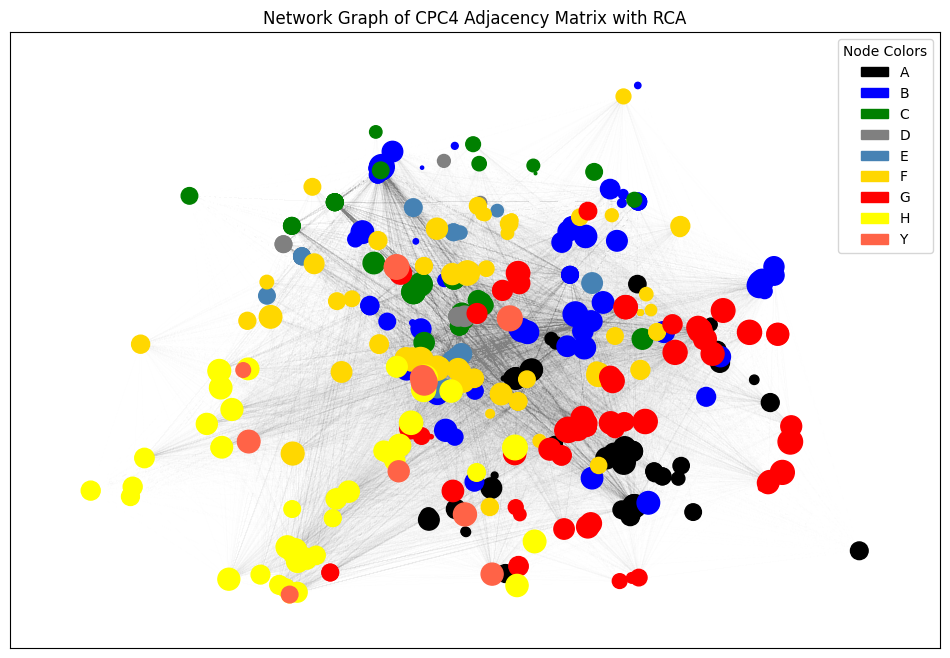

In [ ]:
# Define colors based on the first letter of cpc4
color_map = {
    'A': 'black',
    'B': 'blue',
    'C': 'green',
    'D': 'grey',
    'E': 'steelblue',
    'F': 'gold',
    'G': 'red',
    'H': 'yellow',
    'Y': 'tomato',
}

# Assign colors to nodes based on the first letter of their name
node_colors = [color_map[node[0]] for node in G.nodes()]

# represent the node size by connections
node_sizes = [G.degree(node) * 0.9 for node in G.nodes()]

# Define a custom spring layout function to enhance the separation based on connectivity
def enhanced_spring_layout(G, k=None, iterations=100, seed=1723):
    pos = nx.spring_layout(G, k=k, iterations=iterations, seed=seed)
    distances = dict(nx.all_pairs_shortest_path_length(G))
    max_distance = max(max(lengths.values()) for node, lengths in distances.items())
    factor = 2.0  # Adjust this factor to control separation degree

    for i, (node1, p1) in enumerate(pos.items()):
        for node2, p2 in list(pos.items())[i + 1:]:
            distance = distances[node1].get(node2, max_distance)
            if distance > 1:
                direction = np.array(p2) - np.array(p1)
                norm = np.linalg.norm(direction)
                if norm != 0:
                    direction = direction / norm
                separation = factor * (distance - 1)
                pos[node2] = p1 + separation * direction
    return pos

# Improved node positioning
pos = enhanced_spring_layout(G, seed=42)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis)

# Draw edges with thickness proportional to the weight
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray', width=0.001)

# Add a color legend
import matplotlib.patches as mpatches

handles = [mpatches.Patch(color=color, label=key) for key, color in color_map.items()]
plt.legend(handles=handles, title="Node Colors")

plt.title("Network Graph of CPC4 Adjacency Matrix with RCA")
plt.show()


In [ ]:
#read csv file from /gdrive/My Drive/data/ai_all/BLOCK_TOTAL/pro_df.csv
pro_df = pd.read_csv('/gdrive/My Drive/data/ai_all/BLOCK_TOTAL/pro_df.csv')

In [ ]:
pro_df

,Year,Country,Product,count
0,1999,ABW,101,14473.0
1,2001,ABW,101,11249.0
2,2002,ABW,101,9019.0
3,2003,ABW,101,8613.0
4,2005,ABW,101,59773.0
...,...,...,...,...
3865573,2021,ZWE,9617,18017.0
3865574,2021,ZWE,9704,642.0
3865575,2021,ZWE,9705,6625344.0
3865576,2021,ZWE,4406,27166.0


In [ ]:
pro_df['Year'].unique()

array([1999, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2011, 2012,
       2013, 2014, 2015, 2017, 2018, 2019, 2020, 1997, 1996, 1998, 2000,
       2004, 2010, 2016, 2021, 2022])

In [ ]:
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865578 entries, 0 to 3865577
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Year     int64  
 1   Country  object 
 2   Product  int64  
 3   count    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 118.0+ MB


In [ ]:
# 연도를 정수형으로 변환하고, category 열 추가
pro_df['Year'] = pro_df['Year'].astype(int)
pro_df['Product'] = pro_df['Product'].astype(object)

# 중복 특허 신청 제거
pro_df_unique = pro_df.drop_duplicates(subset=['Year',  'Country', 'Product'])

# 국가 코드 매칭 및 변경
pro_df_unique['Country'] = pro_df_unique['Country'].replace({'GB': 'UK', 'GR': 'EL'})


In [ ]:
pro_df_unique

,Year,Country,Product,count
0,1999,ABW,101,14473.0
1,2001,ABW,101,11249.0
2,2002,ABW,101,9019.0
3,2003,ABW,101,8613.0
4,2005,ABW,101,59773.0
...,...,...,...,...
3865573,2021,ZWE,9617,18017.0
3865574,2021,ZWE,9704,642.0
3865575,2021,ZWE,9705,6625344.0
3865576,2021,ZWE,4406,27166.0


In [ ]:
unique_years = pro_df_unique['Year'].unique()
sorted(unique_years)

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [ ]:
#filter Year = 2019
df_2019 = pro_df_unique[pro_df_unique['Year'] ==2019]
df_2019

,Year,Country,Product,count
16,2019,ABW,101,13582.0
22,2019,AGO,101,7637.0
53,2019,AND,101,46739.0
90,2019,ARE,101,34466828.0
115,2019,ARG,101,22538294.0
...,...,...,...,...
3652394,2019,ANS,9706,4574096.0
3652430,2019,LUX,9706,457419.0
3652451,2019,NAM,9706,5387.0
3652464,2019,SMR,9706,10065.0


In [ ]:
# 국가별 총 count 계산
total_by_country = df_2019.groupby('Country')['count'].sum()

# 제품별 총 count 계산
total_by_product = df_2019.groupby('Product')['count'].sum()

# 전체 총 count 계산
total_count = df_2019['count'].sum()

# RCA 계산
df_2019['RCA'] = (df_2019['count'] / total_by_country[df_2019['Country']].values) / \
                 (total_by_product[df_2019['Product']].values / total_count)

# Binary RCA 계산
df_2019['Binary_RCA'] = (df_2019['RCA'] >= 1).astype(int)

# 결과 출력
df_2019_rca = df_2019
df_2019_rca

<ipython-input-27-0d75a105e35f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['RCA'] = (df_2019['count'] / total_by_country[df_2019['Country']].values) / \
<ipython-input-27-0d75a105e35f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Binary_RCA'] = (df_2019['RCA'] >= 1).astype(int)


,Year,Country,Product,count,RCA,Binary_RCA
16,2019,ABW,101,13582.0,0.492333,0
22,2019,AGO,101,7637.0,0.001348,0
53,2019,AND,101,46739.0,2.372058,1
90,2019,ARE,101,34466828.0,0.459015,0
115,2019,ARG,101,22538294.0,2.222585,1
...,...,...,...,...,...,...
3652394,2019,ANS,9706,4574096.0,0.215836,0
3652430,2019,LUX,9706,457419.0,0.155160,0
3652451,2019,NAM,9706,5387.0,0.005498,0
3652464,2019,SMR,9706,10065.0,0.350777,0


In [ ]:
df_2019_rca.describe()

,Year,count,RCA,Binary_RCA
count,150273.0,1.502730e+05,1.502730e+05,150273.000000
mean,2019.0,1.168916e+08,3.095445e+00,0.199024
std,0.0,1.552374e+09,8.914799e+01,0.399268
min,2019.0,2.500000e+01,3.818480e-07,0.000000
25%,2019.0,3.221500e+04,2.204131e-02,0.000000
50%,2019.0,5.145210e+05,1.415487e-01,0.000000
75%,2019.0,9.524215e+06,7.012741e-01,0.000000
max,2019.0,1.821021e+11,2.186007e+04,1.000000


In [ ]:
#generate df_pro_bipatite_matrix with Country and Product that have a values as count
# Generate the bipartite matrix
df_pro_bipartite_matrix = df_2019_rca.pivot(index='Country', columns='Product', values='Binary_RCA')
df_pro_bipartite_matrix = df_pro_bipartite_matrix.fillna(0)  # Replace NaN with 0 for the matrix

df_pro_bipartite_matrix


Product,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
Country,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AFG,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
ALB,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAF,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#generate an adjacency matrix with cpc4
df_adj_pro = df_pro_bipartite_matrix.T.dot(df_pro_bipartite_matrix)
df_adj_pro

Product,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
Product,,,,,,,,,,,,,,,,,,,,,
101,21.0,12.0,5.0,5.0,7.0,9.0,10.0,6.0,6.0,7.0,...,1.0,2.0,1.0,3.0,6.0,5.0,6.0,7.0,10.0,5.0
102,12.0,50.0,15.0,23.0,17.0,24.0,21.0,8.0,12.0,14.0,...,2.0,5.0,1.0,5.0,2.0,2.0,9.0,11.0,11.0,3.0
103,5.0,15.0,17.0,3.0,9.0,9.0,9.0,1.0,8.0,3.0,...,1.0,2.0,1.0,3.0,1.0,0.0,1.0,4.0,1.0,0.0
104,5.0,23.0,3.0,33.0,9.0,17.0,6.0,3.0,2.0,13.0,...,1.0,2.0,0.0,2.0,0.0,2.0,4.0,5.0,9.0,4.0
105,7.0,17.0,9.0,9.0,37.0,18.0,12.0,5.0,12.0,6.0,...,4.0,3.0,1.0,7.0,3.0,3.0,5.0,7.0,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,5.0,2.0,0.0,2.0,3.0,5.0,1.0,3.0,1.0,1.0,...,0.0,0.0,1.0,2.0,6.0,16.0,6.0,3.0,8.0,4.0
9703,6.0,9.0,1.0,4.0,5.0,10.0,3.0,3.0,3.0,1.0,...,1.0,2.0,1.0,4.0,10.0,6.0,24.0,7.0,14.0,9.0
9704,7.0,11.0,4.0,5.0,7.0,7.0,8.0,5.0,5.0,6.0,...,1.0,2.0,0.0,5.0,6.0,3.0,7.0,30.0,12.0,5.0


In [ ]:
# Create a network graph from the adjacency matrix
G = nx.Graph()

# Add nodes
for node in df_adj_pro.index:
    G.add_node(node)

# Add edges with weights
for i in df_adj_pro.index:
    for j in df_adj_pro.columns:
        if i != j and df_adj_pro.loc[i, j] > 0:
            G.add_edge(i, j, weight=df_adj_pro.loc[i, j])


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


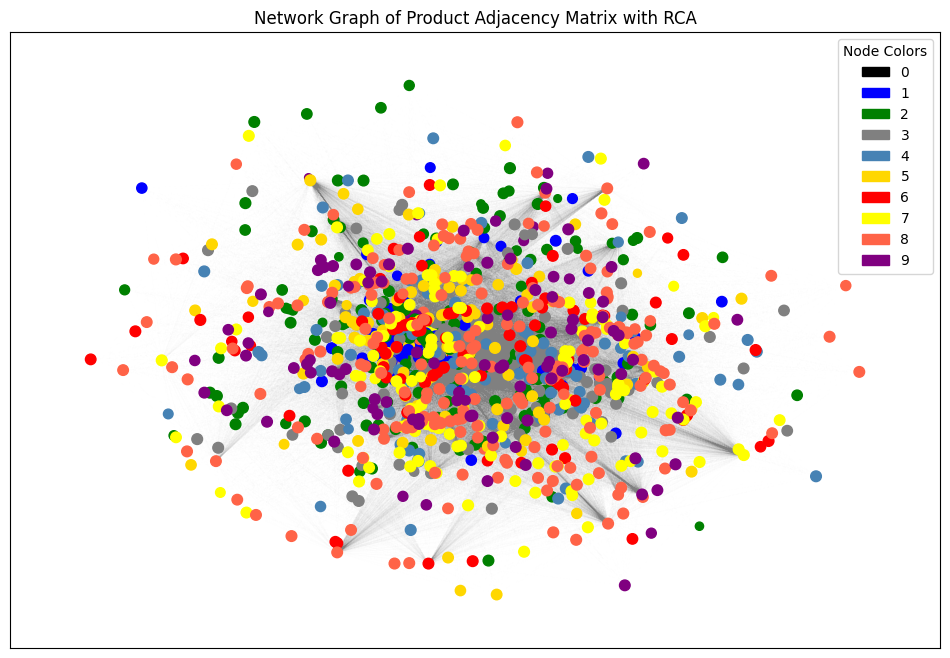

In [ ]:
# Define colors based on the first letter of HS92
color_map = {
    '0': 'black',
    '1': 'blue',
    '2': 'green',
    '3': 'grey',
    '4': 'steelblue',
    '5': 'gold',
    '6': 'red',
    '7': 'yellow',
    '8': 'tomato',
    '9': 'purple',
}

# Assign colors to nodes based on the first letter of their name (converted to string)
node_colors = [color_map[str(node)[0]] for node in G.nodes()]

# represent the node size by connections
node_sizes = [G.degree(node) * 0.05 for node in G.nodes()]

# Define a custom spring layout function to enhance the separation based on connectivity
def enhanced_spring_layout(G, k=None, iterations=100, seed=1723):
    pos = nx.spring_layout(G, k=k, iterations=iterations, seed=seed)
    distances = dict(nx.all_pairs_shortest_path_length(G))
    max_distance = max(max(lengths.values()) for node, lengths in distances.items())
    factor = 2.0  # Adjust this factor to control separation degree

    for i, (node1, p1) in enumerate(pos.items()):
        for node2, p2 in list(pos.items())[i + 1:]:
            distance = distances[node1].get(node2, max_distance)
            if distance > 1:
                direction = np.array(p2) - np.array(p1)
                norm = np.linalg.norm(direction)
                if norm != 0:
                    direction = direction / norm
                separation = factor * (distance - 1)
                pos[node2] = p1 + separation * direction
    return pos

# Improved node positioning
pos = enhanced_spring_layout(G, seed=42)

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis)

# Draw edges with thickness proportional to the weight
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray', width=0.0001)

# Add a color legend
import matplotlib.patches as mpatches

handles = [mpatches.Patch(color=color, label=key) for key, color in color_map.items()]
plt.legend(handles=handles, title="Node Colors")

plt.title("Network Graph of Product Adjacency Matrix with RCA")
plt.show()


In [ ]:

# df_rca_bin 파일에서 ctry, cpc4, bin_rca만을 선택해서 새로운 파일을 생성한다
df_rca_bin_selected = df_rca_bin[['ctry', 'cpc4', 'bin_rca']]

# ISO 2-digit 코드를 ISO 3-digit 코드로 변환하는 함수
def convert_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except AttributeError:
        return None

# ISO 3-digit 코드를 가지는 새로운 컬럼 추가
df_rca_bin_selected['Country'] = df_rca_bin_selected['ctry'].apply(convert_to_iso3)

df_rca_bin_cpc4 = df_rca_bin_selected[['Country', 'cpc4', 'bin_rca']]
df_rca_bin_cpc4


<ipython-input-33-41a80483a537>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rca_bin_selected['Country'] = df_rca_bin_selected['ctry'].apply(convert_to_iso3)


,Country,cpc4,bin_rca
0,ARE,A24B,1
1,ARE,A24F,1
2,ARE,A61B,1
3,ARE,A61M,1
4,ARE,B05B,1
...,...,...,...
2112,LVA,G01J,1
2113,SYC,G11C,1
2114,GIB,C30B,1
2115,GIB,H01J,1


In [ ]:
# df_2019_rca 파일에서 Country, Product, Binary_RCA만을 선택해서 새로운 파일을 생성한다.
df_rca_bin_pro = df_2019_rca[['Country', 'Product', 'Binary_RCA']]
df_rca_bin_pro

,Country,Product,Binary_RCA
16,ABW,101,0
22,AGO,101,0
53,AND,101,1
90,ARE,101,0
115,ARG,101,1
...,...,...,...
3652394,ANS,9706,0
3652430,LUX,9706,0
3652451,NAM,9706,0
3652464,SMR,9706,0


In [ ]:
# Performing the merge on the 'Country' column
df_joined = pd.merge(df_rca_bin_pro, df_rca_bin_cpc4, on='Country', how='inner')
df_joined

,Country,Product,Binary_RCA,cpc4,bin_rca
0,ARE,101,0,A24B,1
1,ARE,101,0,A24F,1
2,ARE,101,0,A61B,1
3,ARE,101,0,A61M,1
4,ARE,101,0,B05B,1
...,...,...,...,...,...
1538199,VGB,9703,0,G06T,1
1538200,VGB,9703,0,G06V,1
1538201,VGB,9703,0,F21V,1
1538202,VGB,9703,0,A45B,1


In [ ]:
# 중복된 Country-Product 조합에 대해 Binary_RCA 값의 최대값을 취하여 중복 제거
df_joined_pro = df_joined.groupby(['Country', 'Product']).agg({'Binary_RCA': 'max'}).reset_index()

# Country, Product를 가지는 매트릭스 생성
matrix_pro = df_joined_pro.pivot(index='Country', columns='Product', values='Binary_RCA')
matrix_pro = matrix_pro.fillna(0)  # NaN 값을 0으로 대체
matrix_pro

Product,101,102,103,104,105,106,201,202,203,204,...,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706
Country,,,,,,,,,,,,,,,,,,,,,
ARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARG,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUS,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUT,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
BEL,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BGR,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
BRB,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
CAN,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 중복된 Country-cpc4 조합에 대해 bin_rca 값의 최대값을 취하여 중복 제거
df_joined_cpc4 = df_joined.groupby(['Country', 'cpc4']).agg({'bin_rca': 'max'}).reset_index()

# Country, cpc4를 가지는 매트릭스 생성
matrix_cpc4 = df_joined_cpc4.pivot(index='Country', columns='cpc4', values='bin_rca')
matrix_cpc4 = matrix_cpc4.fillna(0)  # NaN 값을 0으로 대체
matrix_cpc4

cpc4,A01B,A01C,A01D,A01F,A01G,A01H,A01K,A01M,A01N,A22B,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
Country,,,,,,,,,,,,,,,,,,,,,
ARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
BGR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#generage adjacency matrix by using matrix_pro and matrix_cpc4
adj_pro_cpc4 = matrix_pro.T.dot(matrix_cpc4)
adj_pro_cpc4

cpc4,A01B,A01C,A01D,A01F,A01G,A01H,A01K,A01M,A01N,A22B,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
Product,,,,,,,,,,,,,,,,,,,,,
101,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,...,3.0,1.0,2.0,1.0,5.0,1.0,2.0,2.0,0.0,1.0
102,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,3.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0
103,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
105,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,2.0,1.0,1.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0
9703,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,4.0,1.0,2.0,1.0,4.0,0.0,1.0,3.0,0.0,0.0
9704,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1500x1000 with 0 Axes>

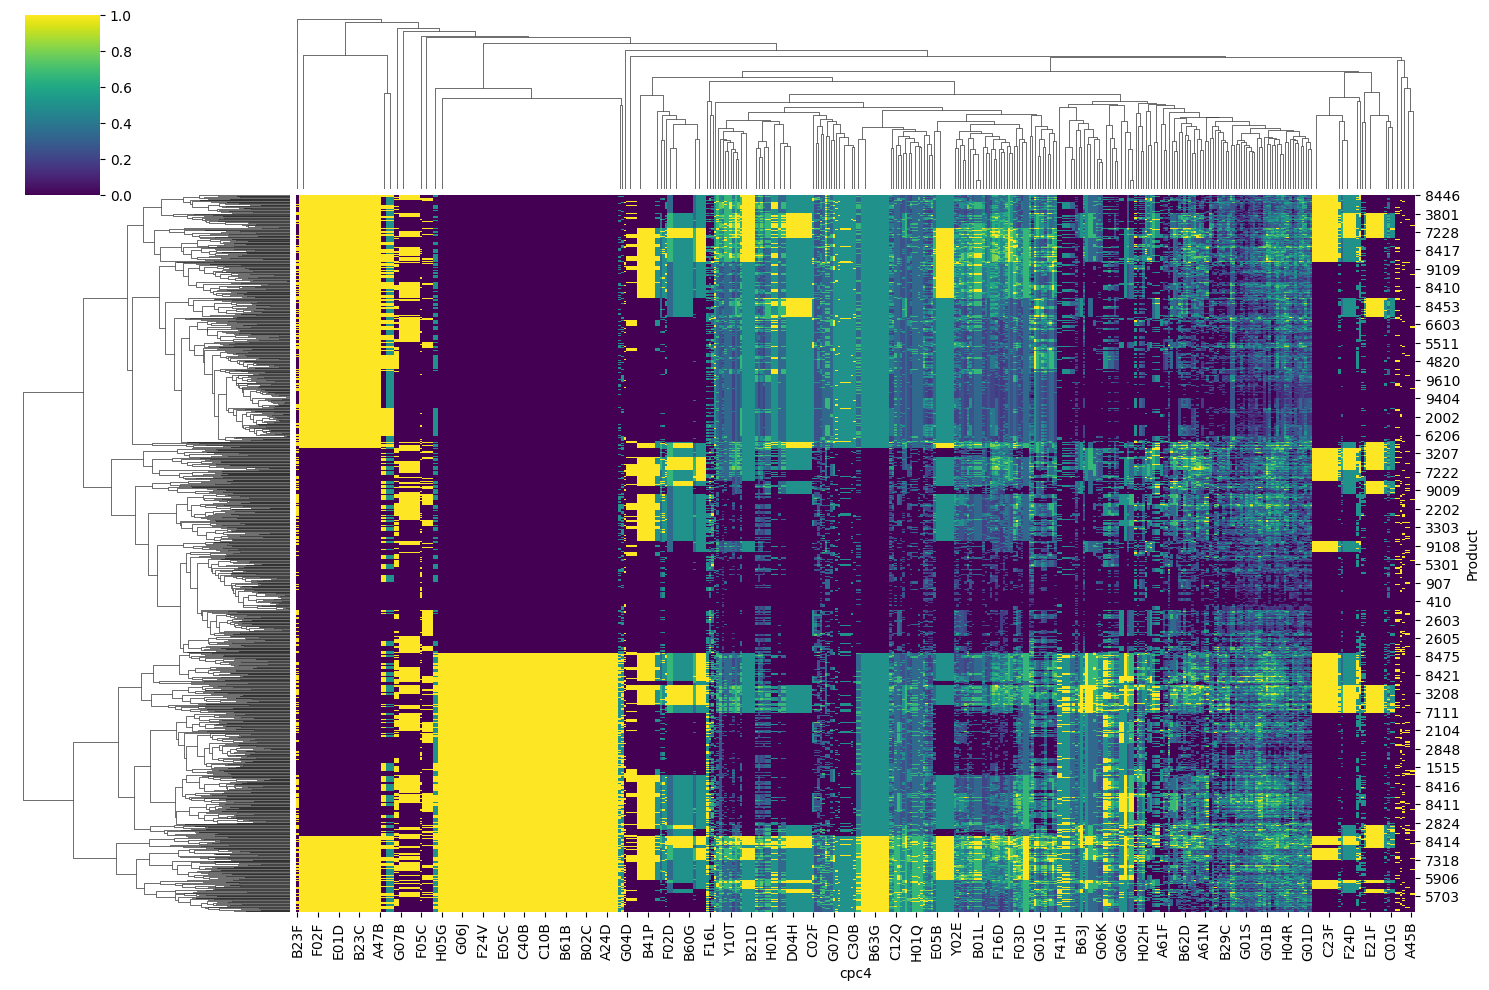

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardizing the data to be between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(adj_pro_cpc4)

# Creating a DataFrame from the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=adj_pro_cpc4.columns, index=adj_pro_cpc4.index)

# Creating a hierarchical clustered heatmap with the scaled data
plt.figure(figsize=(15, 10))
sns.clustermap(df_scaled, cmap='viridis', figsize=(15, 10))
plt.show()

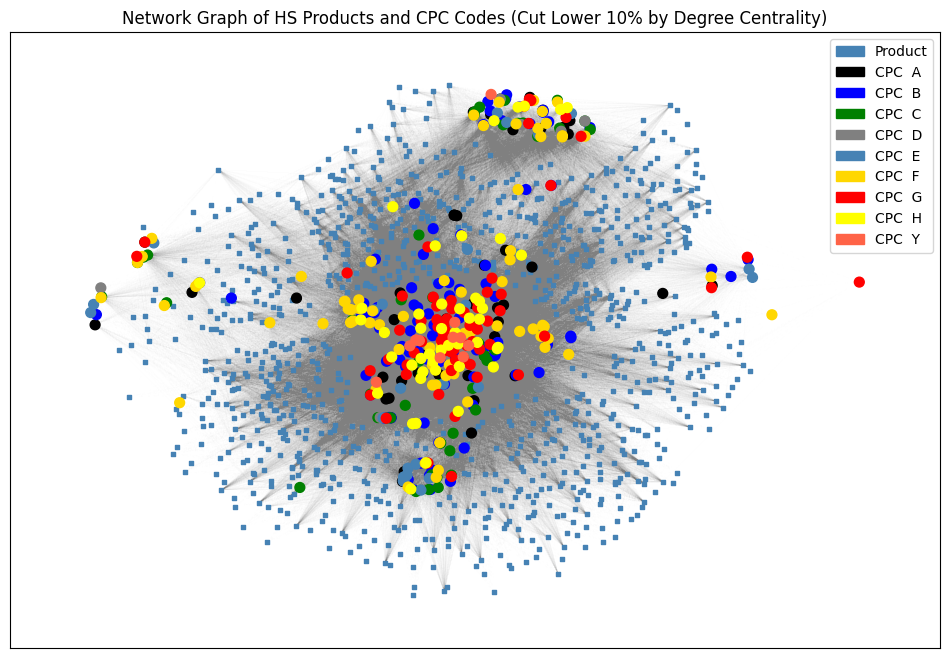

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Define colors based on the first letter of cpc4
color_map = {
    'A': 'black',
    'B': 'blue',
    'C': 'green',
    'D': 'grey',
    'E': 'steelblue',
    'F': 'gold',
    'G': 'red',
    'H': 'yellow',
    'Y': 'tomato',
}

# 네트워크 그래프 생성
G = nx.Graph()

# 노드 추가 (cpc4와 Product 구분)
for product in adj_pro_cpc4.index:
    G.add_node(product, shape='s', node_type='Product')

for cpc4 in adj_pro_cpc4.columns:
    G.add_node(cpc4, shape='o', node_type='cpc4', color=color_map[cpc4[0]])

# 엣지 추가
for product in adj_pro_cpc4.index:
    for cpc4 in adj_pro_cpc4.columns:
        if adj_pro_cpc4.at[product, cpc4] > 0:
            G.add_edge(product, cpc4, weight=adj_pro_cpc4.at[product, cpc4])

# Degree centrality 계산
degree_centrality = nx.degree_centrality(G)

# 상위 80% 노드 필터링
threshold = sorted(degree_centrality.values(), reverse=True)[int(len(degree_centrality) * 0.9)]
top_nodes = {node for node, centrality in degree_centrality.items() if centrality >= threshold}

# 상위 80% 노드만 포함한 서브그래프 생성
H = G.subgraph(top_nodes)

# 네트워크 그래프 시각화
pos = nx.spring_layout(H, k=0.1, iterations=50)

plt.figure(figsize=(12, 8))

# Product 노드 그리기
nx.draw_networkx_nodes(
    H, pos,
    nodelist=[node for node in H.nodes if H.nodes[node]['node_type'] == 'Product'],
    node_shape='s',
    node_color='steelblue',
    node_size=10,  # 노드 크기 조정
    label='Product'
)

# cpc4 노드 그리기
nx.draw_networkx_nodes(
    H, pos,
    nodelist=[node for node in H.nodes if H.nodes[node]['node_type'] == 'cpc4'],
    node_shape='o',
    node_color=[H.nodes[node]['color'] for node in H.nodes if H.nodes[node]['node_type'] == 'cpc4'],
    node_size=50,  # 노드 크기 조정
    label='cpc4'
)

# 엣지 그리기
nx.draw_networkx_edges(H, pos, edge_color='gray', width=0.0005)

# 범례 추가
product_patch = mpatches.Patch(color='steelblue', label='Product')
cpc4_patches = [mpatches.Patch(color=color, label=f'CPC  {key}') for key, color in color_map.items()]
plt.legend(handles=[product_patch] + cpc4_patches, scatterpoints=1)

plt.title('Network Graph of HS Products and CPC Codes (Cut Lower 10% by Degree Centrality)')
plt.show()


In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Install necessary libraries
!pip3 install geopandas statsmodels

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import json
import re
import networkx as nx
from itertools import count, combinations, product
import urllib.request
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm

# Set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)

# Show all results in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Set seaborn style
sns.set_style('whitegrid')

# Enlarged pandas display
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 300)

print('Necessary libraries loaded')


Necessary libraries loaded


In [ ]:
#read csv file from /gdrive/My Drive/data/ai_all/BLOCK_TOTAL/pro_df.csv
df_orig = pd.read_csv('/gdrive/My Drive/data/ai_all/BLOCK_TOTAL/pro_df.csv')

In [ ]:
#rename Year to year of df_orig
df_orig.rename(columns={'Year':'year'},inplace=True)
#rename Product to product_name
df_orig.rename(columns={'Product':'product_code'},inplace=True)
#rename Country to country_name
df_orig.rename(columns={'Country':'country_code'},inplace=True)
df_orig.rename(columns={'count':'export_value'},inplace=True)
# product_code 열을 문자열로 변환
df_orig['product_code'] = df_orig['product_code'].astype(str)

df_orig

,year,country_code,product_code,export_value
0,1999,ABW,101,14473.00
1,2001,ABW,101,11249.00
2,2002,ABW,101,9019.00
3,2003,ABW,101,8613.00
4,2005,ABW,101,59773.00
...,...,...,...,...
3865573,2021,ZWE,9617,18017.00
3865574,2021,ZWE,9704,642.00
3865575,2021,ZWE,9705,6625344.00
3865576,2021,ZWE,4406,27166.00


In [ ]:
!pip install pycountry

import pycountry

# ISO 국가 코드를 국가 이름으로 변환하는 함수
def convert_iso_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_3=country_code).name
    except AttributeError:
        return None

# 국가 이름을 가지는 새로운 컬럼 추가
df_orig['country_name'] = df_orig['country_code'].apply(convert_iso_to_name)

# 결과 출력
print(df_orig)

         year country_code product_code  export_value country_name
0        1999          ABW          101      14473.00        Aruba
1        2001          ABW          101      11249.00        Aruba
2        2002          ABW          101       9019.00        Aruba
3        2003          ABW          101       8613.00        Aruba
4        2005          ABW          101      59773.00        Aruba
...       ...          ...          ...           ...          ...
3865573  2021          ZWE         9617      18017.00     Zimbabwe
3865574  2021          ZWE         9704        642.00     Zimbabwe
3865575  2021          ZWE         9705    6625344.00     Zimbabwe
3865576  2021          ZWE         4406      27166.00     Zimbabwe
3865577  2021          ZWE         7102  165690747.00     Zimbabwe

[3865578 rows x 5 columns]


In [ ]:
#read csv file from /gdrive/My Drive/data/ai_all/BLOCK_TOTAL/pro_df.csv
hs92 = pd.read_csv('/gdrive/My Drive/data/ai_all/hs92_4digits.csv')
hs92['product_code'] = hs92['product_code'].astype(str)
hs92

,product_code,product_name
0,530529,"Abaca (manila hemp or musa textilis nee); processed but not spun, tow, noils and waste, including yarn waste and garnetted stock"
1,530521,Abaca (manila hemp or musa textilis nee); raw
2,680530,"Abrasive powder or grain; natural or artificial, on a base of materials n.e.s. in heading no. 6805, whether or not cut to shape or sewn or otherwise made up"
3,680520,"Abrasive powder or grain; natural or artificial, on a base of paper or paperboard only, whether or not cut to shape or sewn or otherwise made up"
4,6805,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up"
...,...,...
6376,790200,Zinc; waste and scrap
6377,261510,Zirconium ores and concentrates
6378,8109,"Zirconium; articles thereof, including waste and scrap"
6379,810990,"Zirconium; other than unwrought, n.e.s. in heading no. 8109"


In [ ]:
# HS92 코드와 제품 이름을 병합합니다.
df_orig = df_orig.merge(hs92, on='product_code', how='left')
# 결과 출력
df_orig

,year,country_code,product_code,export_value,country_name,product_name
0,1999,ABW,101,14473.00,Aruba,"Horses, asses, mules and hinnies; live"
1,2001,ABW,101,11249.00,Aruba,"Horses, asses, mules and hinnies; live"
2,2002,ABW,101,9019.00,Aruba,"Horses, asses, mules and hinnies; live"
3,2003,ABW,101,8613.00,Aruba,"Horses, asses, mules and hinnies; live"
4,2005,ABW,101,59773.00,Aruba,"Horses, asses, mules and hinnies; live"
...,...,...,...,...,...,...
3865573,2021,ZWE,9617,18017.00,Zimbabwe,"Vacuum flasks and other vacuum vessels, complete with cases; parts thereof other than glass inners"
3865574,2021,ZWE,9704,642.00,Zimbabwe,"Stamps, postage or revenue; stamp-postmarks, first-day covers, postal stationery (stamped paper) and like, used, or if unused not of current or new issue in the country to which they are destined"
3865575,2021,ZWE,9705,6625344.00,Zimbabwe,"Collections and collectors' pieces; of zoological, botanical, mineralogical, anatomical, historical, archaeological, palaeontological, ethnographic or numismatic interest"
3865576,2021,ZWE,4406,27166.00,Zimbabwe,Railway or tramway sleepers (cross-ties) of wood


In [ ]:
df_orig.sample(n=5) # show 5 random rows

,year,country_code,product_code,export_value,country_name,product_name
1081411,2006,DNK,3404,173742000.00,Denmark,"Waxes; artificial, prepared"
2994114,2008,HND,8478,3004.00,Honduras,"Machinery; for preparing or making up tobacco, n.e.s. in this chapter"
73741,2011,ISL,401,4866.00,Iceland,Milk and cream; not concentrated nor containing added sugar or other sweetening matter
2934607,2005,HUN,8462,8242358.00,Hungary,"Machine-tools; (including presses) for working metal by forging, hammering or die-stamping, for bending, folding, straightening, flattening, shearing or punching metal"
694555,2009,CYP,2617,318593.00,Cyprus,Ores and concentrates; n.e.s. in heading no. 2601


In [ ]:
df_orig['year'].unique()

array([1999, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2011, 2012,
       2013, 2014, 2015, 2017, 2018, 2019, 2020, 1997, 1996, 1998, 2000,
       2004, 2010, 2016, 2021, 2022])

In [ ]:
df_orig['product_name'].nunique()

1206

In [ ]:
STRING = 'KOR'
df_orig[df_orig['country_code'].str.contains(STRING)][['country_code']].drop_duplicates()

,country_code
1506,KOR


In [ ]:
df_orig[df_orig['product_code']=='8542']

,year,country_code,product_code,export_value,country_name,product_name
3198091,1996,ABW,8542,78182.00,Aruba,Electronic integrated circuits and microassemblies
3198092,1997,ABW,8542,6884.00,Aruba,Electronic integrated circuits and microassemblies
3198093,1998,ABW,8542,6925.00,Aruba,Electronic integrated circuits and microassemblies
3198094,2000,ABW,8542,1745.00,Aruba,Electronic integrated circuits and microassemblies
3198095,2003,ABW,8542,139628.00,Aruba,Electronic integrated circuits and microassemblies
...,...,...,...,...,...,...
3861444,2021,UZB,8542,441292.00,Uzbekistan,Electronic integrated circuits and microassemblies
3863002,2022,UZB,8542,736379.00,Uzbekistan,Electronic integrated circuits and microassemblies
3864066,2021,VNM,8542,14493984589.00,Viet Nam,Electronic integrated circuits and microassemblies
3864306,2021,ZMB,8542,44881.00,Zambia,Electronic integrated circuits and microassemblies


In [ ]:
import re


# NaN 값을 빈 문자열로 채우기
df_orig['product_name'] = df_orig['product_name'].fillna('')

STRING = 'wine'
result = df_orig[df_orig['product_name'].str.contains(STRING, flags=re.IGNORECASE, regex=True)][['product_name']].drop_duplicates()

print(result)


                                                                                                                                                 product_name
5700                                                                                                                                              Swine; live
22672                                                                                                                 Meat of swine; fresh, chilled or frozen
29549                                          Edible offal of bovine animals, swine, sheep, goats, horses, asses, mules or hinnies; fresh, chilled or frozen
543650                                                        Wine of fresh grapes, including fortified wines; grape must other than that of heading no. 2009
547837                                                                  Vermouth and other wine of fresh grapes, flavoured with plants or aromatic substances
1776301  Twine, cordage, ropes and cables, whether o

In [ ]:
# create a 'dataframe' called 'df2' with only exports from USA in 2012
df2 = df_orig[ (df_orig['country_code']=='USA') & (df_orig['year'] == 2012) ].copy()
# create another dataframe 'df3' that contains the sum of exports per product
df3 = df2.groupby(['product_code','product_name'],as_index=False)['export_value'].sum()
# sort
df3.sort_values(by=['export_value'],ascending=False,inplace=True)
# show first 10 rows
df3[0:10]

,product_code,product_name,export_value
186,2710,"Petroleum oils, oils from bituminous minerals, not crude; preparations n.e.s. containing less than 70% petroleum oils, oils from bituminous minerals; these being the basic constituents of the preparations",100154687488.00
1072,8703,"Motor cars and other motor vehicles; principally designed for the transport of persons (other than those of heading no. 8702), including station wagons and racing cars",52327849984.00
1077,8708,"Motor vehicles; parts and accessories, of heading no. 8701 to 8705",41123254272.00
1054,8542,Electronic integrated circuits and microassemblies,33952661504.00
751,7108,"Gold (including gold plated with platinum) unwrought or in semi-manufactured forms, or in powder form",30544572416.00
998,8471,"Automatic data processing machines and units thereof; magnetic or optical readers, machines for transcribing data onto data media in coded form and machines for processing such data n.e.s.",29319948288.00
1087,8802,"Aircraft; (eg helicopters, aeroplanes), spacecraft (including satellites) and spacecraft launch vehicles",29008398336.00
288,3004,"Medicaments; (not goods of heading no. 3002, 3005 or 3006) consisting of mixed or unmixed products for therapeutic or prophylactic use, put up in measured doses or in forms or packings for retail sale",24745129984.00
1117,9018,"Instruments and appliances used in medical, surgical, dental or veterinary sciences, including scintigraphic apparatus, other electro-medical apparatus and sight testing instruments",23736475648.00
23,1201,Soya beans; whether or not broken,23294107648.00


<Axes: xlabel='year'>

Text(0.5, 1.0, 'Export Value of Product Code 8542 from USA')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Export Value')

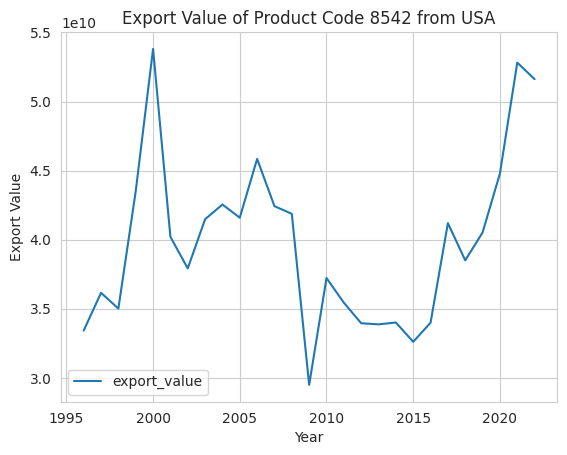

In [ ]:
# USA 데이터만 필터링
df2 = df_orig[df_orig['country_code'] == 'USA'].copy()

# 제품 코드가 101인 데이터만 필터링
df3 = df2[df2['product_code'] == '8542']
#df3 = df2[df2['product_name'] == 'Cars']

# 연도별 수출 값 플롯팅
df3.plot(x='year', y='export_value', kind='line')
plt.title('Export Value of Product Code 8542 from USA')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Yearly Export Value of Semiconductors from South Korea')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Export Value (in millions)')

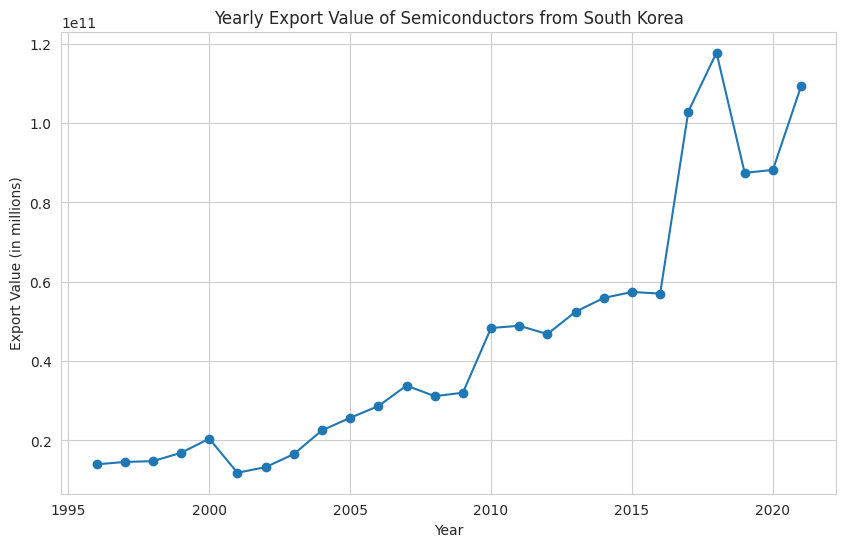

In [ ]:
# 한국의 반도체 수출 데이터 필터링
df_kor_semiconductor = df_orig[(df_orig['country_code'] == 'KOR') & (df_orig['product_code'] == '8542')]

# 연도별 수출량 집계
df_kor_semiconductor_yearly = df_kor_semiconductor.groupby('year')['export_value'].sum().reset_index()

# 연도별 수출량 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_kor_semiconductor_yearly['year'], df_kor_semiconductor_yearly['export_value'], marker='o', linestyle='-')
plt.title('Yearly Export Value of Semiconductors from South Korea')
plt.xlabel('Year')
plt.ylabel('Export Value (in millions)')
plt.grid(True)
plt.show()

In [ ]:
def calc_rca(data,country_col,product_col,time_col,value_col):
    """
    Calculates Revealed Comparative Advantage (RCA) of country-product-time combinations

    Returns:
        pandas dataframe with RCAs
    """

    # Aggregate to country-product-time dataframe
    print('creating all country-product-time combinations')
    # - add all possible products for each country with export value 0
    # - else matrices later on will have missing values in them, complicating calculations
    df_all = pd.DataFrame(list(product(data[time_col].unique(), data[country_col].unique(),data[product_col].unique())))
    df_all.columns=[time_col,country_col,product_col]
    print('merging data in')
    df_all = pd.merge(df_all,data[[time_col,country_col,product_col,value_col]],how='left',on=[time_col,country_col,product_col])
    df_all.loc[df_all[value_col].isnull(),value_col] = 0

    # Calculate the properties
    print('calculating properties')
    df_all['Xcpt'] = df_all[value_col]
    df_all['Xct'] = df_all.groupby([country_col, time_col])[value_col].transform(sum)
    df_all['Xpt'] = df_all.groupby([product_col, time_col])[value_col].transform(sum)
    df_all['Xt'] = df_all.groupby([time_col])[value_col].transform('sum')
    df_all['RCAcpt'] = (df_all['Xcpt']/df_all['Xct'])/(df_all['Xpt']/df_all['Xt'])
    # set to 0 if missing, e.g. if product / country have 0 (total) exports
    df_all.loc[df_all['RCAcpt'].isnull(),'RCAcpt'] = 0
    # drop the properties
    df_all.drop(['Xcpt','Xct','Xpt','Xt'],axis=1,inplace=True,errors='ignore')

    return df_all

df_rca = calc_rca(data=df_orig,country_col='country_code',product_col='product_name',time_col='year',value_col='export_value')

print('rca dataframe ready')

# Add product codes back in (we need these to merge data from other sources, we dont necessarily need product names but they are kept for illustrative purposes)
df_rca = pd.merge(df_rca,df_orig[['product_name','product_code']].drop_duplicates(),how='left',on='product_name')

print('df_rca ready')
# show results

creating all country-product-time combinations
merging data in
calculating properties
rca dataframe ready
df_rca ready


In [ ]:
# Mcp 열 생성: RCAcpt가 1보다 크면 1, 그렇지 않으면 0
df_rca['Mcp'] = df_rca['RCAcpt'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
df_rca.sample(n=5)

,year,country_code,product_name,export_value,RCAcpt,product_code,Mcp
1135282,2003,LBR,Organic derivatives of hydrazine or of hydroxylamine,0.00,0.00,2928,0
3682568,2014,TGO,"Lac; natural gums, resins, gum-resins and balsams",102583.00,1.13,1301,1
2550806,2009,LSO,"Copper; bars, rods and profiles",0.00,0.00,7407,0
849722,2002,MYT,"Weighing machines; excluding balances of a sensitivity of 5cg or better, including weight operated counting or checking machines and weights of all kinds",0.00,0.00,8423,0
2356522,2009,BLR,Electric generating sets and rotary converters,240056.00,0.01,8502,0


In [ ]:
# The Netherlands
print("\n Korea: \n")

# df_rca[ (df_rca['year']==2000) & (df_rca['country_code']=='KOR')].sort_values(by=['RCAcpt'],ascending=False)[['product_name','RCAcpt','year']][0:5]
# 데이터 필터링, 정렬 및 상위 5개 행 선택
df_rca[(df_rca['year'] == 2000) & (df_rca['country_code'] == 'KOR')].sort_values(by=['RCAcpt'], ascending=False)[['product_name', 'RCAcpt', 'year']][0:5]

print("\n USA:\n")

# USA
df_rca[ (df_rca['year']==2000) & (df_rca['country_code']=='USA')].sort_values(by=['RCAcpt'],ascending=False)[['product_name','RCAcpt','year']][0:5]


 Korea: 



,product_name,RCAcpt,year
6223729,"Light-vessels, fire-floats, dredgers, floating cranes, other vessels; the navigability of which is subsidiary to main function; floating docks, floating, submersible drilling, production platforms",12.08,2000
6223098,"Inner tubes, of rubber",9.15,2000
6223111,"Patent leather and patent laminated leather, metallised leather",9.02,2000
6223268,"Labels, badges and similar articles; of textile materials, in the piece, in strips or cut to shape or size, not embroidered",8.34,2000
6223725,"Cruise ships, excursion boats, ferry-boats, cargo ships, barges and similar vessels for the transport of persons or goods",8.24,2000



 USA:



,product_name,RCAcpt,year
6315662,Grain sorghum,6.41,2000
6316734,"Military weapons; other than revolvers, pistols and arms of heading no. 9307",5.66,2000
6315759,"Residues of starch manufacture, similar residues; beet-pulp, bagasse and other waste of sugar manufacture, brewing or distilling dregs and waste, whether or not in the form of pellets",5.23,2000
6315673,Soya beans; whether or not broken,4.74,2000
6315893,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",4.68,2000


In [ ]:
def calc_cppt(data,country_col,product_col):
    """
    Calculates product co-occurences in countries

    Returns:
        pandas dataframe with co-occurence value for each product pair
    """

    # Create combinations within country_col (i.e. countries) of entities (i.e. products)
    dft = (data.groupby(country_col)[product_col].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
            .reset_index(level=1, drop=True)
            .reset_index())
    dft.rename(columns={0:f'{product_col}_1'}, inplace=True)
    dft.rename(columns={1:f'{product_col}_2'}, inplace=True)

    # Create second half of matrix (assymmetrical):
    # -- {product_col} 1 X {product_col} 2 == {product_col} 2 X {product_col} 1
    dft2 = dft.copy()
    dft2.rename(columns={f'{product_col}_1':f'{product_col}_2t'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2':f'{product_col}_1'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2t':f'{product_col}_2'}, inplace=True)
    # -- add second half
    dft3 = pd.concat([dft,dft2],axis=0,sort=False)

    # Drop diagonal if present
    dft3 = dft3[ dft3[f'{product_col}_1'] != dft3[f'{product_col}_2'] ]

    # Now calculate N of times that {product_col}s occur together
    dft3['count'] = 1
    dft3 = dft3.groupby([f'{product_col}_1',f'{product_col}_2'],as_index=False)['count'].sum()
    dft3.rename(columns={f'count':f'Cpp'}, inplace=True)

    # Calculate ubiquity
    df_ub = data.groupby(product_col,as_index=False)['Mcp'].sum()
    # Merge ubiqity into cpp matrix
    df_ub.rename(columns={f'{product_col}':f'{product_col}_1'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_1')
    df_ub.rename(columns={f'{product_col}_1':f'{product_col}_2'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_2')

    # Take minimum of conditional probabilities
    dft3['kpi'] = dft3['Cpp']/dft3['Mcp_x']
    dft3['kpj'] = dft3['Cpp']/dft3['Mcp_y']
    dft3['phi'] = dft3['kpi']
    dft3.loc[dft3['kpj']<dft3['kpi'],'phi'] = dft3['kpj']

    return dft3

In [ ]:
# Keep only year 1995
dft = df_rca[df_rca['year']==2000].copy()

# Keep only country-product combinations where Mcp == 1 (thus RCAcp > 1)

dft = dft[dft['Mcp']==1]

# Calculate cpp
df_cppt = calc_cppt(dft,country_col='country_code',product_col='product_name')

print('cppt product co-occurences and proximities dataframe ready')

cppt product co-occurences and proximities dataframe ready


In [ ]:
df_cppt.sort_values(by=['Cpp'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
1116351,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches and shorts (other than swimwear); men's or boys' (not knitted or crocheted)",64,73,77,0.88,0.83,0.83
1112773,"Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches and shorts (other than swimwear); men's or boys' (not knitted or crocheted)","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",64,77,73,0.83,0.88,0.83
614418,"Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",57,65,65,0.88,0.88,0.88
132428,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted",57,65,65,0.88,0.88,0.88
615251,"Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",57,65,70,0.88,0.81,0.81
1114733,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted",57,70,65,0.81,0.88,0.81
1114320,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",56,70,65,0.80,0.86,0.80
1115157,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches and shorts (other than swimwear); men's or boys' (not knitted or crocheted)",56,70,77,0.80,0.73,0.73
1143072,"T-shirts, singlets and other vests; knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",56,68,70,0.82,0.80,0.80
1115182,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","T-shirts, singlets and other vests; knitted or crocheted",56,70,68,0.80,0.82,0.80


In [ ]:
df_cppt.sort_values(by=['phi'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
614418,"Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",57,65,65,0.88,0.88,0.88
132428,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted",57,65,65,0.88,0.88,0.88
258574,"Coats; women's or girls' overcoats, carcoats, capes, cloaks, anoraks, ski-jackets, wind-cheaters, wind-jackets and similar articles, other than those of heading no. 6204 (not knitted or crocheted)","Overcoats, car-coats, capes, cloaks, anoraks (including ski-jackets), wind-cheaters, wind-jackets and similar articles, men's or boys', other than those of heading no. 6203 (not knitted or crocheted)",49,57,54,0.86,0.91,0.86
838619,"Overcoats, car-coats, capes, cloaks, anoraks (including ski-jackets), wind-cheaters, wind-jackets and similar articles, men's or boys', other than those of heading no. 6203 (not knitted or crocheted)","Coats; women's or girls' overcoats, carcoats, capes, cloaks, anoraks, ski-jackets, wind-cheaters, wind-jackets and similar articles, other than those of heading no. 6204 (not knitted or crocheted)",49,54,57,0.91,0.86,0.86
1116351,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches and shorts (other than swimwear); men's or boys' (not knitted or crocheted)",64,73,77,0.88,0.83,0.83
1112773,"Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches and shorts (other than swimwear); men's or boys' (not knitted or crocheted)","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",64,77,73,0.83,0.88,0.83
615251,"Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",57,65,70,0.88,0.81,0.81
1114733,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Jerseys, pullovers, cardigans, waistcoats and similar articles; knitted or crocheted",57,70,65,0.81,0.88,0.81
1257790,"Underpants, briefs, nightshirts, pyjamas, bathrobes, dressing gowns and similar articles; men's or boys', knitted or crocheted","Slips, petticoats, briefs, panties, nightdresses, pyjamas, negligees, bathrobes, dressing gowns and similar articles; women's or girls', knitted or crocheted",50,59,62,0.85,0.81,0.81
1075533,"Slips, petticoats, briefs, panties, nightdresses, pyjamas, negligees, bathrobes, dressing gowns and similar articles; women's or girls', knitted or crocheted","Underpants, briefs, nightshirts, pyjamas, bathrobes, dressing gowns and similar articles; men's or boys', knitted or crocheted",50,62,59,0.81,0.85,0.81


In [ ]:
### 파일 경로 리스트 생성
### AI Patents
file_names = [f"/gdrive/My Drive/data/ai_all/BLOCK_TOTAL/resulttable ({i}).csv" for i in range(1, 8)]

### Healthcare
# file_names = [f"/gdrive/My Drive/data/ai_all/HEALTHCARE_TOTAL/resulttable ({i}).csv" for i in range(1, 7)]

### Manufacturing
# file_names = [f"/gdrive/My Drive/data/ai_all/MANUFACTURE_TOTAL/resulttable ({i}).csv" for i in range(1, 60)]

### Finance
# file_names = [f"/gdrive/My Drive/data/ai_all/FINANCE_TOTAL/resulttable ({i}).csv" for i in range(1, 8)]



# 모든 CSV 파일을 읽어서 데이터프레임 리스트에 저장
all_data = [pd.read_csv(file, delimiter=';',
                        names=["appln_id", "earliest_filing_year", "person_ctry_code", "cpc_class_symbol", "nace2_code"],
                        skiprows=1) for file in file_names]

# 모든 데이터프레임을 하나로 결합
all_data = pd.concat(all_data, ignore_index=True)

# 열 이름 변경
all_data = all_data.rename(columns={
    "appln_id": "ap",
    "earliest_filing_year": "year",
    "person_ctry_code": "ctry",
    "cpc_class_symbol": "cpc",
    "nace2_code": "nace2"
})

In [ ]:
# CPC 코드의 처음 네 문자 추출
all_data['cpc4'] = all_data['cpc'].str[:4]

# 연도를 정수형으로 변환하고, category 열 추가
all_data['year'] = all_data['year'].astype(int)
all_data['category'] = "AI Patents"

# 중복 특허 신청 제거
all_data_unique_ai = all_data.drop_duplicates(subset=['ap', 'year', 'ctry', 'cpc'])

# 국가 코드 매칭 및 변경
all_data_unique_ai['ctry'] = all_data_unique_ai['ctry'].replace({'GB': 'UK', 'GR': 'EL'})

# CSV 파일로 저장
#all_data_unique_ai.to_csv("/gdrive/My Drive/data/ai_all/pat_ai_all.csv", index=False)

In [ ]:
dfp1 = all_data_unique_ai
dfp1

,ap,year,ctry,cpc,nace2,cpc4,category
0,506640999,2017,US,G01M 13/028,29.10,G01M,AI Patents
1,506640999,2017,US,G01M 15/12,29.10,G01M,AI Patents
2,506640999,2017,US,Y02T 10/40,29.10,Y02T,AI Patents
3,506640999,2017,US,F02B 63/04,26.50,F02B,AI Patents
4,506640999,2017,US,F02B 77/083,26.50,F02B,AI Patents
...,...,...,...,...,...,...,...
3901766,506640547,2014,US,H04L 65/752,26.20,H04L,AI Patents
3901767,506640547,2014,US,H04L 65/80,26.20,H04L,AI Patents
3901768,506640547,2014,US,H04N 21/23805,26.20,H04N,AI Patents
3901769,506640547,2014,US,H04N 21/2402,26.20,H04N,AI Patents


In [ ]:
dfp1.sample(n=10)

,ap,year,ctry,cpc,nace2,cpc4,category
3200535,381340192,2003,UK,A61B 5/14552,32.50,A61B,AI Patents
1347255,469059163,2015,US,G06V2201/03,28.23,G06V,AI Patents
3249,506918082,2017,US,G06T2207/20084,26.20,G06T,AI Patents
73395,512369525,2017,US,G06N 5/01,26.20,G06N,AI Patents
3288656,417062603,2007,SE,A61M 16/0057,32.50,A61M,AI Patents
1026095,51864471,2006,FI,G06T 5/009,28.23,G06T,AI Patents
2227056,51639891,2002,AT,G10L 15/18,28.23,G10L,AI Patents
3211507,405984068,2009,DE,C12Q2600/158,21.00,C12Q,AI Patents
3864007,503812609,2017,US,B33Y 40/20,22.00,B33Y,AI Patents
466077,536891763,2018,CN,G06V 40/19,28.23,G06V,AI Patents


In [ ]:
!pip install pycountry
import pycountry

In [ ]:
# ISO 2자리 국가 코드를 ISO 3자리 국가 코드와 국가 이름으로 변환하는 함수
def get_country_info(alpha_2_code):
    try:
        country = pycountry.countries.get(alpha_2=alpha_2_code)
        # Handle the case where country is None
        if country:
            return country.alpha_3, country.name
        else:
            return "Unknown", "Unknown"
    except LookupError:
        return "Unknown", "Unknown"

# ISO 3자리 코드와 국가 이름을 가지는 새로운 컬럼 추가
dfp1['country_code'], dfp1['country_name'] = zip(*dfp1['ctry'].apply(get_country_info))

# 결과 출력
dfp1

,ap,year,ctry,cpc,nace2,cpc4,category,country_code,country_name
0,506640999,2017,US,G01M 13/028,29.10,G01M,AI Patents,USA,United States
1,506640999,2017,US,G01M 15/12,29.10,G01M,AI Patents,USA,United States
2,506640999,2017,US,Y02T 10/40,29.10,Y02T,AI Patents,USA,United States
3,506640999,2017,US,F02B 63/04,26.50,F02B,AI Patents,USA,United States
4,506640999,2017,US,F02B 77/083,26.50,F02B,AI Patents,USA,United States
...,...,...,...,...,...,...,...,...,...
3901766,506640547,2014,US,H04L 65/752,26.20,H04L,AI Patents,USA,United States
3901767,506640547,2014,US,H04L 65/80,26.20,H04L,AI Patents,USA,United States
3901768,506640547,2014,US,H04N 21/23805,26.20,H04N,AI Patents,USA,United States
3901769,506640547,2014,US,H04N 21/2402,26.20,H04N,AI Patents,USA,United States


In [ ]:

dfp1.rename(columns={'cpc4': 'tech'}, inplace=True)


In [ ]:
# year, country_name, tech로 그룹화하고 각 그룹의 개수를 세서 count 변수 생성
dfp = dfp1.groupby(['year', 'country_name', 'tech']).size().reset_index(name='count')


In [ ]:
dfp['year'].min()
dfp['year'].max()

1990

2023

In [ ]:
print('Unique N of counties:')

dfp['country_name'].nunique()

print('Unique N of technologies:')

dfp['tech'].nunique()

Unique N of counties:


118

Unique N of technologies:


646

In [ ]:
dfp_rca = calc_rca(data=dfp,
                   country_col='country_name',
                   product_col='tech',
                   time_col='year',
                   value_col='count')
print('patent rcas ready')

creating all country-product-time combinations
merging data in
calculating properties
patent rcas ready


In [ ]:
# What were Japan and Germany specialized in, in 1960 and 2010?
for country in ['Japan','Germany']:
    for year in [1960, 2010]:
        print(f"---------")
        print(f"\n {country} in {year} \n")
        dft = dfp_rca[dfp_rca['country_name']==country].copy()
        dft = dft[dft['year']==year]
        # --
        dft.sort_values(by=['RCAcpt'],ascending=False)[0:10]

---------

 Japan in 1960 



,year,country_name,tech,count,RCAcpt


---------

 Japan in 2010 



,year,country_name,tech,count,RCAcpt
1531876,2010,Japan,B21C,2.00,15.77
1532202,2010,Japan,G04C,1.00,15.77
1532142,2010,Japan,F01M,1.00,15.77
1532250,2010,Japan,G21H,3.00,15.77
1531924,2010,Japan,F02K,4.00,10.51
1532143,2010,Japan,F02N,8.00,9.70
1531834,2010,Japan,H10K,35.00,8.49
1531722,2010,Japan,G02F,53.00,7.88
1531964,2010,Japan,H10B,10.00,7.88
1532070,2010,Japan,C21B,4.00,7.88


---------

 Germany in 1960 



,year,country_name,tech,count,RCAcpt


---------

 Germany in 2010 



,year,country_name,tech,count,RCAcpt
1528759,2010,Germany,B28B,4.00,18.71
1528753,2010,Germany,F24C,2.00,18.71
1528845,2010,Germany,A01B,6.00,18.71
1528608,2010,Germany,B25D,4.00,18.71
1528866,2010,Germany,F02F,1.00,18.71
1528868,2010,Germany,F05C,5.00,18.71
1528658,2010,Germany,B60J,1.00,18.71
1528727,2010,Germany,H02G,6.00,16.03
1528746,2010,Germany,F16J,8.00,14.97
1528562,2010,Germany,E01C,7.00,14.55


In [ ]:
# Define Mcp
dfp_rca['Mcp'] = 0
dfp_rca.loc[dfp_rca['RCAcpt']>1,'Mcp'] = 1

# Keep only years 2010
#dft = dfp_rca[ (dfp_rca['year']>=1990) & (dfp_rca['year']<=2020)].copy()
dft = dfp_rca[ (dfp_rca['year']==2010) ].copy()

# Keep only country-product combinations where Mcp == 1 (thus RCAcp > 1)
dft = dft[dft['Mcp']==1]

# Calculate cppt
dfp_cppt = calc_cppt(dft,country_col='country_name',product_col='tech')
print('cppt patent co-occurences and proximities dataframe ready')

# Show most proximate technologies
dfp_cppt.sort_values(by=['phi'],ascending=False)[0:10]

cppt patent co-occurences and proximities dataframe ready


,tech_1,tech_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
15698,B28B,B25D,1,1,1,1.00,1.00,1.00
53996,F24H,A23B,1,1,1,1.00,1.00,1.00
24926,B64U,C08H,1,1,1,1.00,1.00,1.00
24924,B64U,C06C,1,1,1,1.00,1.00,1.00
4823,A61D,G01Q,2,2,2,1.00,1.00,1.00
24923,B64U,C06B,1,1,1,1.00,1.00,1.00
24920,B64U,B81C,1,1,1,1.00,1.00,1.00
24919,B64U,B81B,1,1,1,1.00,1.00,1.00
24918,B64U,B67D,1,1,1,1.00,1.00,1.00
53992,F24H,A01D,1,1,1,1.00,1.00,1.00


In [ ]:
dfp

,year,country_name,tech,count
0,1990,Australia,B22C,2
1,1990,Australia,B22D,4
2,1990,Australia,B29C,1
3,1990,Australia,G06F,3
4,1990,Australia,G06T,3
...,...,...,...,...
52654,2023,Australia,G10L,2
52655,2023,United States,G06F,4
52656,2023,United States,G06T,4
52657,2023,United States,G16H,4


In [ ]:
dfp['country_name'].nunique()
dfp['tech'].nunique()

118

646

In [ ]:
# keep 1980 and 2017
dfp_rca = dfp[ (dfp['year']==1990) | (dfp['year']==2023)]


dfp_rca = calc_rca(data=dfp_rca,
                   country_col='country_name',
                   product_col='tech',
                   time_col='year',
                   value_col='count')

# -- calculate
print('patent rcas ready')

creating all country-product-time combinations
merging data in
calculating properties
patent rcas ready


In [ ]:
for country_name in ['CA > Santa Clara > San Jose','MI > Wayne > Detroit']:
    for year in [1990, 2023]:
        print(f"---------")
        print(f"\n {country_name} in {year} \n")
        dft = dfp_rca[dfp_rca['country_name']==country_name].copy()
        dft = dft[dft['year']==year]
        dft = dft[dft['count']>5]
        # --
        dft.sort_values(by=['RCAcpt'],ascending=False)[0:10]

---------

 CA > Santa Clara > San Jose in 1990 



,year,country_name,tech,count,RCAcpt


---------

 CA > Santa Clara > San Jose in 2023 



,year,country_name,tech,count,RCAcpt


---------

 MI > Wayne > Detroit in 1990 



,year,country_name,tech,count,RCAcpt


---------

 MI > Wayne > Detroit in 2023 



,year,country_name,tech,count,RCAcpt


In [ ]:
# Define Mcp
dfp_rca['Mcp'] = 0
dfp_rca.loc[dfp_rca['RCAcpt']>1,'Mcp'] = 1

# Keep only years 2010
#dft = dfp_rca[ (dfp_rca['year']>=1990) & (dfp_rca['year']<=2023)].copy()
dft = dfp_rca[ (dfp_rca['year']==2023) ].copy()

# Keep only country-product combinations where Mcp == 1 (thus RCAcp > 1)
dft = dft[dft['Mcp']==1]

# Calculate cppt
dfp_cppt = calc_cppt(dft,country_col='country_name',product_col='tech')
print('cppt patent co-occurences and proximities dataframe ready')

# Show most proximate technologies
dfp_cppt.sort_values(by=['phi'],ascending=False)[0:10]

cppt patent co-occurences and proximities dataframe ready


,tech_1,tech_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
0,G06F,G06T,1,1,1,1.00,1.00,1.00
1,G06F,G16H,1,1,1,1.00,1.00,1.00
2,G06F,H04L,1,1,1,1.00,1.00,1.00
3,G06T,G06F,1,1,1,1.00,1.00,1.00
4,G06T,G16H,1,1,1,1.00,1.00,1.00
5,G06T,H04L,1,1,1,1.00,1.00,1.00
6,G16H,G06F,1,1,1,1.00,1.00,1.00
7,G16H,G06T,1,1,1,1.00,1.00,1.00
8,G16H,H04L,1,1,1,1.00,1.00,1.00
9,H04L,G06F,1,1,1,1.00,1.00,1.00


In [ ]:
import requests
url = 'https://raw.githubusercontent.com/cid-harvard/py-productspace/master/create_product_space_v2.py'
r = requests.get(url)
# print(r.content)
exec(r.content)
print('product space code imported')
# execfile('/Users/admin/Dropbox/proj/git_clones/py-productspace/create_product_space_v2.py')
# print("ran local file")

product space code imported


In [ ]:
# Find out what 'country_name corresponds to South Korea
STRING = 'KOR'
df_rca[df_rca['country_code'].str.contains(STRING)][['country_code']].drop_duplicates()
# result: South Korea

,country_code
110070,KOR


In [ ]:
# # Plot in the product space
# create_product_space(df_plot_dataframe=df_rca,
#                      df_plot_node_col='product_code',
#                      df_node_size_col='export_value',
#                      )

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3


In [ ]:
!pip install ecomplexity
print('installed py-ecomplexity')

installed py-ecomplexity


In [ ]:
from ecomplexity import ecomplexity
from ecomplexity import proximity

# To use py-ecomplexity, specify the following columns
trade_cols = {'time':'year',
              'loc':'country_name',
              'prod':'product_name',
              'val':'export_value'}

# Then run the command
print('calculating ecomplexity')

# only 2000 now for time sake; economplexity will calculate the values for each year
# dft  = df_orig[df_orig['year']==2000]

df_ec = ecomplexity(df_orig, trade_cols)

print('finished calculating')

# # Keep selected columns
# df_ec = df_ec[[[['country_name',
#                'product_name',
#                'product_code',
#                'export_value',
#                'year',
#                'pci',
#                'eci']]]]

# Show results
df_ec.sample(n=10)

,country_name,product_name,export_value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,country_code,product_code
0,Afghanistan,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",0.00,1999,67.00,16.00,0.00,-0.30,4.30,0.03,-0.62,1.72,0.00,NaN,NaN
1,Afghanistan,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",0.00,1999,67.00,8.00,0.00,-0.30,3.34,0.03,-0.62,1.16,0.00,NaN,NaN
2,Afghanistan,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",0.00,1999,67.00,23.00,0.00,-0.30,2.60,0.05,-0.62,1.04,0.00,NaN,NaN
3,Afghanistan,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",0.00,1999,67.00,21.00,0.00,-0.30,1.65,0.04,-0.62,0.85,0.00,NaN,NaN
4,Afghanistan,"Acids; saturated acyclic monocarboxylic acids and their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",1851.00,1999,67.00,14.00,0.00,-0.30,3.01,0.04,-0.62,1.34,0.03,AFG,2915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7227410,Zambia,,2207.00,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZMB,8487
7227411,Zambia,,266213.00,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZMB,9619
7227412,Zimbabwe,,1075862.00,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,4113
7227413,Zimbabwe,,388143.00,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,6005


In [ ]:
# Removing rows with NaN values in 'country_code' and 'product_code' columns
df_ec_cleaned = df_ec.dropna(subset=['country_code', 'product_code','diversity'])
df_ec_cleaned

,country_name,product_name,export_value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,country_code,product_code
4,Afghanistan,"Acids; saturated acyclic monocarboxylic acids and their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",1851.00,1999,67.00,14.00,0.00,-0.30,3.01,0.04,-0.62,1.34,0.03,AFG,2915
5,Afghanistan,"Acids; unsaturated acyclic monocarboxylic, cyclic monocarboxylic , their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",1771.00,1999,67.00,15.00,0.00,-0.30,3.04,0.04,-0.62,1.41,0.03,AFG,2916
6,Afghanistan,Acrylic polymers in primary forms,4430.00,1999,67.00,10.00,0.00,-0.30,4.76,0.03,-0.62,1.66,0.06,AFG,3906
8,Afghanistan,"Acyclic alcohols and their halogenated, sulphonated, nitrated or nitrosated derivatives",75933.00,1999,67.00,26.00,0.00,-0.30,1.33,0.05,-0.62,0.54,0.62,AFG,2905
13,Afghanistan,"Air conditioning machines; comprising a motor driven fan and elements for changing the temperature and humidity, including those machines in which the humidity cannot be separately regulated",217419.00,1999,67.00,20.00,1.00,-0.30,1.52,0.06,-0.62,0.00,1.14,AFG,8415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175152,Uzbekistan,Zinc; articles n.e.s. in chapter 79,231.00,2022,188.00,16.00,0.00,-0.69,2.46,0.14,0.46,0.97,0.00,UZB,7907
7175153,Uzbekistan,"Zinc; bars, rods, profiles and wire",691630.00,2022,188.00,11.00,1.00,-0.69,1.15,0.20,0.46,0.00,7.69,UZB,7904
7175155,Uzbekistan,Zinc; oxide and peroxide,271220.00,2022,188.00,16.00,0.00,-0.69,0.11,0.18,0.46,0.32,0.28,UZB,2817
7175157,Uzbekistan,Zinc; unwrought,239007664.00,2022,188.00,15.00,1.00,-0.69,0.26,0.20,0.46,0.00,22.41,UZB,7901


In [ ]:
# -- Global settings
# - import python libraries necessary for this workshop
# suppress warnings on google colab for now
import warnings
warnings.filterwarnings("ignore")
# to interact with os, e.g. to execute shell comands such as 'ls', 'pwd' etc.
import os
# to do data processing
import pandas as pd
# backend of pandas, working with matrices
import numpy as np
# to visualize data (in pandas)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
# to process a json file
import json
# work with regex in python
import re
# work with networks in python, to create product space
import networkx as nx
# python tools to work with combinations of arrays
from itertools import count
from itertools import combinations
from itertools import product
# to download files
import urllib.request, json
# to plot data on maps
# pip install is needed on Google Colab
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # Show all results of jupyter
import seaborn as sns
sns.set_style('whitegrid') # Display grids on dark background
# to run regressions
import statsmodels.api as sm
# Enlarged pandas display - more colums and rows with greater width
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('necessary libraries loaded')

necessary libraries loaded


In [ ]:
import requests
url = 'https://raw.githubusercontent.com/cid-harvard/py-productspace/master/create_product_space_v2.py'
r = requests.get(url)
# print(r.content)
exec(r.content)
print('product space code imported')
# execfile('/Users/admin/Dropbox/proj/git_clones/py-productspace/create_product_space_v2.py')
# print("ran local file")

product space code imported


In [ ]:
# Select country
df_ps = df_ec_cleaned[df_ec_cleaned['country_code']=='KOR'].copy()
df_ps


# Select year
df_ps = df_ps[df_ps['year']==2005].copy()

# Select RCA > 1
df_ps = df_ps[df_ps['rca']>1]

# Keep only relevant columns
df_ps = df_ps[['product_name','product_code','export_value']]

# Keep only products with minimum value threshold
exports_min_threshold = 40000000
df_ps = df_ps[df_ps['export_value']>exports_min_threshold]

# Show resulting dataframe
df_ps.sample(n=5)

# Save file
# df_ps.to_csv(f'~/Dropbox/df_product_space.csv',index=False, encoding='utf-8')
# print('saved')

print('ready to plot in product space')

,country_name,product_name,export_value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca,country_code,product_code
124218,"Korea, Republic of","Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",73580800.00,1999,249.00,16.00,1.00,0.95,4.30,0.22,1.35,0.00,1.60,KOR,6805
124219,"Korea, Republic of","Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",139763.00,1999,249.00,8.00,0.00,0.95,3.34,0.16,1.35,1.03,0.08,KOR,2911
124220,"Korea, Republic of","Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",20598788.00,1999,249.00,23.00,0.00,0.95,2.60,0.21,1.35,0.86,0.18,KOR,2918
124221,"Korea, Republic of","Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",614147136.00,1999,249.00,21.00,1.00,0.95,1.65,0.28,1.35,0.00,4.76,KOR,2917
124222,"Korea, Republic of","Acids; saturated acyclic monocarboxylic acids and their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",77930992.00,1999,249.00,14.00,0.00,0.95,3.01,0.19,1.35,1.13,0.66,KOR,2915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966829,"Korea, Republic of",Zinc; oxide and peroxide,82127139.00,2021,229.00,24.00,1.00,2.18,0.75,0.24,0.52,-0.00,1.58,KOR,2817
6966830,"Korea, Republic of","Zinc; plates, sheets, strip and foil",5356858.00,2021,229.00,8.00,0.00,2.18,1.55,0.23,0.52,0.29,0.30,KOR,7905
6966831,"Korea, Republic of",Zinc; unwrought,1631912908.00,2021,229.00,18.00,1.00,2.18,-0.66,0.24,0.52,-0.00,3.75,KOR,7901
6966832,"Korea, Republic of",Zinc; waste and scrap,21000.00,2021,229.00,43.00,0.00,2.18,0.07,0.18,0.52,-0.18,0.00,KOR,7902


,product_name,product_code,export_value
1216557,"Sheep or lamb skin leather, without wool on, excluding leather of heading no. 4108 or 4109",4105,78363064.00
1216347,"Nonwovens; whether or not impregnated, coated, covered or laminated",5603,381193664.00
1216229,"Machinery (not of heading no. 8450) for washing, cleaning, wringing, drying, ironing, pressing, bleaching, dyeing, dressing, finishing, coating or impregnating textile yarn, fabrics or made up articles",8451,348677664.00
1216794,Wire of iron or non-alloy steel,7217,275769792.00
1216519,"Retreaded or used pneumatic tyres of rubber; solid or cushion tyres, interchangeable tyre treads and tyre flaps, of rubber",4012,41910604.00


ready to plot in product space


In [ ]:
import requests
url = 'https://raw.githubusercontent.com/cid-harvard/py-productspace/master/create_product_space_v2.py'
r = requests.get(url)
# print(r.content)
exec(r.content)
print('product space code imported')
# Plot in the product space



product space code imported


ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 3


In [ ]:
create_product_space(df_plot_dataframe=df_ps,
                     df_plot_node_col='product_code',
                     df_node_size_col='export_value',
                     )

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

text = "I went to the school"
text = text.lower()

tokens = word_tokenize(text)

# enumerate(): 인자로 넘어온 것을 인덱스와 원소를 튜플로 짝지어 반환한다.
word_index = {word: i + 1 for i, word in enumerate(tokens)}

print(word_index)

{'i': 1, 'went': 2, 'to': 3, 'the': 4, 'school': 5}